In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NLP Solutions: WordNet

In [98]:
import nltk
from nltk.corpus import wordnet as wn

In [99]:
angry = wn.synset('angry.a.01')
angry.definition()

'feeling or showing anger'

In [100]:
anger = wn.synset('anger.n.01')
furious = wn.synset('furious.a.01')
happy = wn.synset('happy.a.01')
bird = wn.synset('bird.n.01')
ai = wn.synset('ai.n.01')

In [101]:
angry.path_similarity(anger)

0.1111111111111111

In [102]:
angry.path_similarity(furious)

0.3333333333333333

In [103]:
angry.path_similarity(happy)

0.3333333333333333

In [104]:
angry.path_similarity(bird)

0.08333333333333333

In [105]:
angry.path_similarity(ai)

0.09090909090909091

In [106]:
bird.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('living_thing.n.01'),
 Synset('organism.n.01'),
 Synset('animal.n.01'),
 Synset('chordate.n.01'),
 Synset('vertebrate.n.01'),
 Synset('bird.n.01')]

In [107]:
bird.hyponyms()

[Synset('apodiform_bird.n.01'),
 Synset('aquatic_bird.n.01'),
 Synset('archaeopteryx.n.01'),
 Synset('archaeornis.n.01'),
 Synset('bird_of_passage.n.02'),
 Synset('bird_of_prey.n.01'),
 Synset('caprimulgiform_bird.n.01'),
 Synset('carinate.n.01'),
 Synset('cock.n.05'),
 Synset('coraciiform_bird.n.01'),
 Synset('cuculiform_bird.n.01'),
 Synset('dickeybird.n.01'),
 Synset('gallinaceous_bird.n.01'),
 Synset('hen.n.02'),
 Synset('ibero-mesornis.n.01'),
 Synset('nester.n.02'),
 Synset('night_bird.n.01'),
 Synset('nonpasserine_bird.n.01'),
 Synset('parrot.n.01'),
 Synset('passerine.n.01'),
 Synset('piciform_bird.n.01'),
 Synset('protoavis.n.01'),
 Synset('ratite.n.01'),
 Synset('sinornis.n.01'),
 Synset('trogon.n.01'),
 Synset('twitterer.n.01')]

NLP Solutions: One-hot Vectors

In [108]:
class SVDModel:
    def __init__(self):
        self.texts = []
        self.word2id = {}
        self.id2word = {}
        self.word_vec = np.array(0)

    def add_datas(self, *texts):
        for text in texts:
            self.texts.append(text)
            self.__word2id_generator(text)

    def __preprocess(self, text):
        words = text.lower().replace('.', ' .').replace(',', ' ,').replace('!', ' !').replace('?', ' ?').replace('\'', ' \' ').split(' ')
        return words
    
    def __word2id_generator(self, text):
        words = self.__preprocess(text)
        for word in words:
            if word not in self.word2id:
                new_id = len(self.word2id)
                self.word2id[word] = new_id
                self.id2word[new_id] = word
    
    def co_occurence(self, window=1):        
        co_occurence_matrix = np.zeros(shape=(len(self.word2id), len(self.word2id)))

        for text in self.texts:
            words = self.__preprocess(text)
            for i in range(len(words)):
                center_id = self.word2id.get(words[i])

                for win in range(-window, window + 1):
                    if 0 <= i + win < len(words):
                        context_id = self.word2id.get(words[i + win])
                        if win != 0:
                            co_occurence_matrix[center_id, context_id] += 1
                    
        return co_occurence_matrix
    
    def __SVD(self, A):
        U, sigma, V_star = np.linalg.svd(A)
        self.word_vec = U
        return U, sigma, V_star
    
    def __dim_reduce(self, wordvec_size, window=1):
        U, sigma, V_star = self.__SVD(self.co_occurence(window=window))
        word_vec = U[:, :wordvec_size]
        self.word_vec = word_vec
        return word_vec
    
    def generate_word_vec(self, wordvec_size, window=1, verbose=True):
        vec_plot = self.__dim_reduce(wordvec_size=wordvec_size, window=window)
        if verbose:
            yticks = self.word2id.keys()
            plt.figure(figsize=(0.7*wordvec_size, 0.7*len(yticks)))
            sns.heatmap(vec_plot, yticklabels=yticks, cmap='Blues', cbar=False, annot=True, square=True)
            plt.yticks(rotation=0)
        
            plt.show()
        

In [109]:
svdmod = SVDModel()
svdmod.add_datas('I enjoy flying.', 'I like NLP.', 'I like deep learning.')
print(svdmod.word2id.keys())
print(svdmod.co_occurence())

dict_keys(['i', 'enjoy', 'flying', '.', 'like', 'nlp', 'deep', 'learning'])
[[0. 1. 0. 0. 2. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [2. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]]


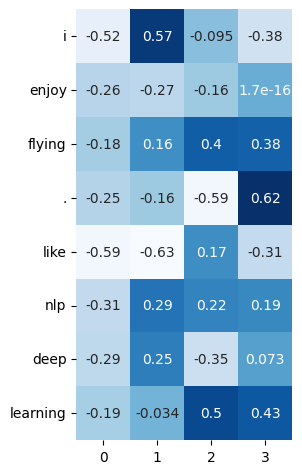

In [110]:
svdmod.generate_word_vec(4)

In [111]:
more_sample_texts = ['The quick brown fox jumps over the lazy dog.',
                    'I love eating pizza and pasta on weekends.',
                    'The sun is shining brightly in the clear blue sky.',
                    'Can you recommend an interesting movie to watch?',
                    'I am feeling tired and could use a cup of coffee.',
                    'The movie I watched last night was absolutely amazing!',
                    'Let\'s meet at the park for a picnic this weekend.',
                    'I enjoy playing guitar in my free time.',
                    'The movie I watched yesterday was interesting.',
                    'The heavy traffic in the city during holiday is frustrating.',
                    'I like pasta and you prefer pizza.',
                    'They went to the park and I joined them.',
                    'It is a beautiful day outside.',
                    'There is a park nearby and it is perfect for picnics.',
                    'I enjoy music and dancing.',
                    'He plays guitar while she sings.',
                    'Do not forget to bring your umbrella because there might be rain.',
                    'You should try the new restaurant because it serves delicious pizza.',
                    'They often go hiking in the mountains.',
                    'It is important to stay hydrated, especially during summer.']

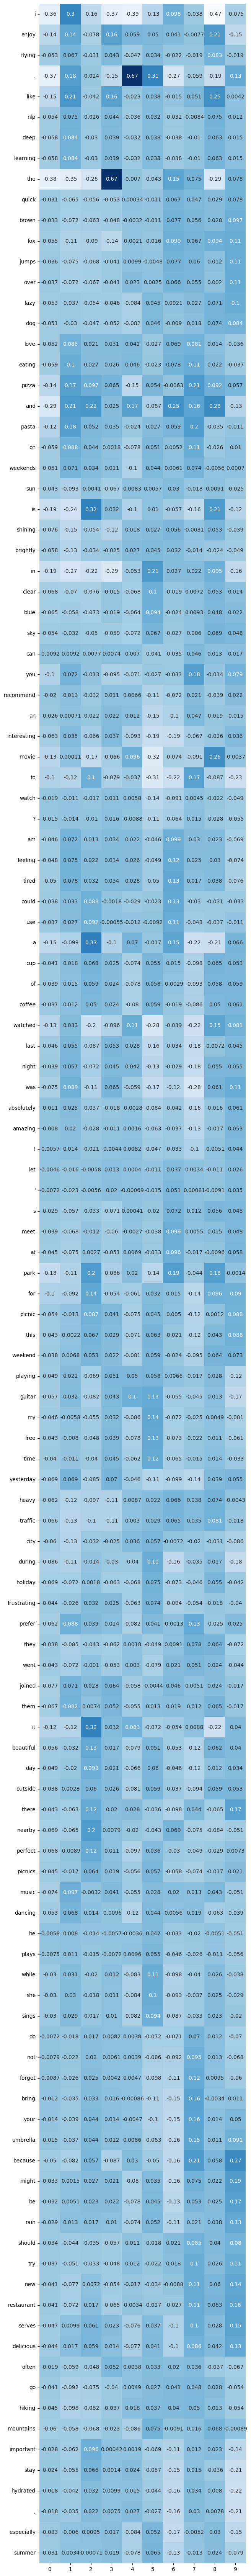

In [112]:
for text in more_sample_texts:
    svdmod.add_datas(text)

svdmod.generate_word_vec(wordvec_size=10, window=3)

In [113]:
def vec_dist(vec1, vec2):
    return np.sum(np.power(np.subtract(vec1, vec2), 2))

In [114]:
def word_dist(word1, word2):
    return vec_dist(svdmod.word_vec[svdmod.word2id.get(word1)], svdmod.word_vec[svdmod.word2id.get(word2)])

In [115]:
word_dist('summer', 'holiday')

0.02040857722348069

In [116]:
word_dist('i', 'you')

0.6277806996704781

In [117]:
word_dist('enjoy', 'like')

0.046498620199173744

In [118]:
word_dist('i', 'restaurant')

0.9038081525266881

In [119]:
word_dist('watch', 'movie')

0.17311274573008928

In [120]:
word_dist('picnic', 'park')

0.17612077554121974

In [121]:
word_dist('movie', 'picnic')

0.3264269991990524

cf ) COALS

In [122]:
word_dist('hydrated', 'hiking')

0.0936304601639159

위와 같이 등장 빈도수가 낮은 어휘는 a, the, I 등에 비해 vector size가 충분히 크지 않아, 구분 자체가 되지 않는다.     
$\rightarrow$ 자주 등장하는 어휘(function words)의 vector size 상한선을 정해 빈도수가 낮은 어휘와 비슷한 크기를 갖게 한다.    
    
구체적인 방법: 빈도수의 log를 취하고 상한선과의 minimum 연산을 가한다.

Language Rules on Word Vector

In [123]:
lang_rules_texts = ['Man is to woman as king is to queen.',
                    'Walk is to walked as jump is to jumped.',
                    'Cat is to meow as dog is to bark.',
                    'Big is to bigger as small is to smaller.',
                    'Apple is to fruit as carrot is to vegetable.',
                    'Swim is to swimming as run is to running.',
                    'Happy is to happiness as sad is to sadness.',
                    'Teacher is to educate as student is to learn.',
                    'Pen is to write as brush is to paint.',
                    'Book is to read as movie is to watch.']

for text in lang_rules_texts:
    svdmod.add_datas(text)

svdmod.generate_word_vec(wordvec_size=10, window=3, verbose=False)

man_id = svdmod.word2id.get('man')
woman_id = svdmod.word2id.get('woman')
king_id = svdmod.word2id.get('king')
queen_id = svdmod.word2id.get('queen')

analogy_to_queen_vec = svdmod.word_vec[king_id] - svdmod.word_vec[man_id] + svdmod.word_vec[woman_id]
queen_vec = svdmod.word_vec[queen_id]

In [124]:
# analogy_to_queen_vec과 queen_vec 사이의 거리
vec_dist(analogy_to_queen_vec, queen_vec)

0.050705446439421924

In [125]:
vec_dist(svdmod.word_vec[svdmod.word2id.get('i')], queen_vec)

0.5348125036293927

NLP Solutions: word2vec

아직 미완성입니다..

In [126]:
class SkipGramsNet:
    def __init__(self, word_vec_size=5):
        self.texts = []
        self.word2id = {}
        self.id2word = {}
        self.word_vec_c = np.array(shape=(word_vec_size, ))
        self.word_vec_o = np.array(shape=(word_vec_size, ))

    def add_datas(self, *texts):
        for text in texts:
            self.texts.append(text)
            self.__word2id_generator(text)
            self.__word_vec_generator()

    def __preprocess(self, text):
        words = text.lower().replace('.', ' .').replace(',', ' ,').replace('!', ' !').replace('?', ' ?').replace('\'', ' \' ').split(' ')
        return words

    def __word2id_generator(self, text):
        words = self.__preprocess(text)
        for word in words:
            if word not in self.word2id:
                new_id = len(self.word2id)
                self.word2id[word] = new_id
                self.id2word[new_id] = word

    def __word_vec_generator(self):
        temp_word_vec_c = self.word_vec_c
        temp_word_vec_o = self.word_vec_o

        while self.word_vec_c.shape[0] < len(self.word2id):
            temp_word_vec_c.append(np.zeros(shape=self.word_vec_c[0]))
            temp_word_vec_o.append(np.zeros(shape=self.word_vec_o[0]))


    def loss(self, text, window=1):
        words = self.__preprocess(text)
        T = len(words)
        log_sum = 0
        for t in range(T):
            pass
        

    def __P_as_softmax(self, idx_o, idx_c, window):
        numerator, denominator = 0, 0
        for idx in range(idx_c - window, idx_c + window + 1):
            soft = self.__cal_soft(idx, idx_c)
            denominator += soft
            if idx == idx_o:
                numerator += soft
        
        return numerator / denominator

    def __cal_soft(self, idx_w, idx_c):
        u_w = self.word_vec[idx_w]
        v_c = self.word_vec[idx_c]
        return np.exp(np.matmul(u_w.T, v_c))



class CBOWNet:
    def __init__(self):
        pass
